In [2]:
''' (x, y) ~ F(x,y)
z2n = max(x1, ... ,xn, y1, ... , yn)
//make histogram
tn = (z2n - bn)/an
ettan = z2n/bn

an = 1
bn = ln(2n)
! f(x,y) = exp(-x-y+tetta*xy)((1-tetta*x)(1-tetta*y)+tetta)
F(u,v) = 1-e^-u - e^-v + e^(-u-v)+tetta*uv

F_lim = 1-2*exp(-x)+exp(-2*x) + tetta*x**2
F_hz = exp(-exp(-x))
'''
""

''

In [16]:
import numpy as np
import pandas as pd
import scipy
from scipy import optimize
from scipy.optimize import fmin
x_lst = []
y_lst = []
Z_2n = []
etta_n = []
T_n = []

In [17]:
def minf(x):
    if x[0] > 0 and x[1] > 0:
        return - np.exp(-x[0]-x[1]+tetta*x[0]*x[1])*((1-tetta*x[0])*(1-tetta*x[1])+tetta) + 0.0
    else:
        return 0

extrem_f = fmin(minf,[0,0])[1]
print extrem_f

Optimization terminated successfully.
         Current function value: -0.368052
         Iterations: 37
         Function evaluations: 73
0.484831180804


$$F(x,y) = \int_{-\infty}^{x}\int_{-\infty}^{y} f(x,y) dydx$$

$$f(x,y) = \frac{\partial^2{F(x,y)}}{\partial{x}\partial{y}}$$ 

In [18]:
def f(x, y):
    return np.exp(-x-y+tetta*x*y)*((1-tetta*x)*(1-tetta*y)+tetta) + 0.0

In [19]:
def F(u, v):
    return 1-np.exp(-u) - np.exp(-v) + np.exp(-u-v)+tetta*u*v

In [20]:
def get_sample():
    good_sample = False
    X = Y = 0;
    while(good_sample == False):
        u1, u2, u3 = np.random.random(3)
        X = a + (b - a) * u2
        Y = c + (d - c) * u1
        if (u1 <= f(X, Y) / extrem_f):
            good_sample = True
    return (X,Y)

In [21]:
def make_samples():
    for i in xrange(n):
        x_new, y_new = get_sample()
        x_lst.append(x_new)
        y_lst.append(y_new)
        Z_2n.append(max(max(x_lst), max(y_lst)))
        T_n.append(max(max(x_lst), max(y_lst)) - np.log(2*(i+1)))
        etta_n.append(max(max(x_lst), max(y_lst)) / np.log(2*(i+1)))

In [22]:
extrem_f = 1 #temporal value
tetta = - 0.97
n = 1750
a = 0
b = 20
c = 0;
d = 20

tmp = fmin(minf,[0,0])
extrem_f = f(tmp[0], tmp[1])
print extrem_f

np.random.seed(seed=11) # extr_f = 1: 4 11 15 24 2**32-16 ///a,d = 10: 18 20++ 44+- 47 50+- // a d = 20:  3+-
x_lst = []
y_lst = []
Z_2n = []
etta_n = []
T_n = []

make_samples()
df = pd.DataFrame(Z_2n)

Optimization terminated successfully.
         Current function value: -0.368052
         Iterations: 37
         Function evaluations: 73
0.36805187896


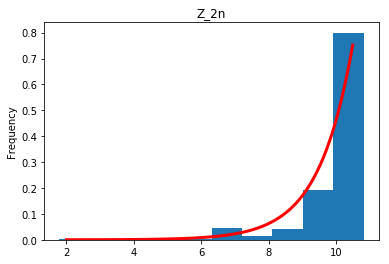

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(20,10))
df.plot(kind='hist', title='Z_2n', normed=1, legend=False)
t = np.arange(2.0, 10.5, 0.01) # 9.5
s = 2.8*2*np.exp(-2*t)*(np.exp(tetta*t**2)*(tetta*t-1)+np.exp(t))
p = plt.plot(t[::-1], s, lw=3, c = "red")

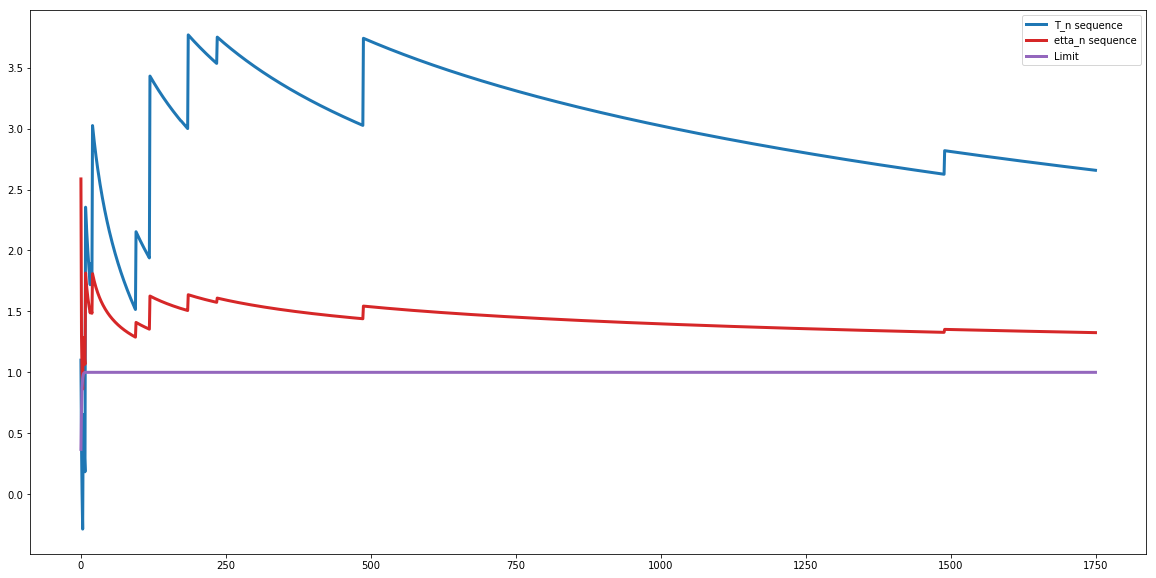

In [24]:
plt.figure(figsize=(20,10))
p1 = plt.plot(T_n, c = "tab:blue", label="T_n sequence", lw=3)
p1 = plt.plot(etta_n, c = "tab:red", label="etta_n sequence", lw=3)
t1 = np.arange(0.0, n, 1)
s1 = np.exp(-np.exp(-t1))
p1 = plt.plot(t1, s1, lw=3, c = "tab:purple", label="Limit")
plt.legend()